In [2]:
import os
import numpy as np
from PIL import Image
from time import time

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.metrics import Recall, Precision
from keras.models import load_model

# 데이터 경로 설정
dataset_path = "/Users/kimsy/DataScience/dataset/fm_img/horizontal/train"

# 이미지 크기
img_size = (224, 224)

# 배치 사이즈
batch_size = 16

# 데이터 증강 및 전처리 정의
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=5)

val_datagen = ImageDataGenerator(rescale=1./255)

# 학습 및 검증용 데이터 생성
train_generator = train_datagen.flow_from_directory(dataset_path,
                                                    target_size=img_size,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    classes=['good', 'ng'])

val_generator = val_datagen.flow_from_directory(dataset_path,
                                                target_size=img_size,
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                classes=['good', 'ng'])

# 모델 생성 함수
def create_model(base_model):
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Flatten()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.2)(x)
    x = Dense(256, activation='relu')(x)
    output_tensor = Dense(2, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=output_tensor)
    
    # 기존 모델 가중치 동결
    for layer in base_model.layers:
        layer.trainable = False
    
    # 모델 컴파일
    model.compile(optimizer=Adam(lr=1e-4),
                  loss = 'binary_crossentropy',
                  metrics=['accuracy'])
    
    return model

# 모델 학습 함수
def train_model(model, model_name):
    early_stop = EarlyStopping(monitor='val_loss', patience=3)
    checkpoint = ModelCheckpoint(f'{model_name}.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
    
    # 모델 학습
    history = model.fit(train_generator,
                        steps_per_epoch=train_generator.n // batch_size,
                        epochs=30,
                        validation_data=val_generator,
                        validation_steps=val_generator.n // batch_size,
                        callbacks = [early_stop, checkpoint],
                        class_weight={0: 4.0, 1: 1.0})
    
    return history

# MobileNetV2 모델 선택 및 학습
base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=(img_size[0], img_size[1], 3)))
model = create_model(base_model)
print("Training MobileNetV2...")
history = train_model(model, 'MobileNetV2')

print("MobileNetV2 model has been trained and saved.")


Found 920 images belonging to 2 classes.
Found 920 images belonging to 2 classes.


Training MobileNetV2...
Epoch 1/30
57/57 [==============================] - ETA: 0s - loss: 2.8516 - accuracy: 0.7157
Epoch 1: val_loss improved from inf to 0.26602, saving model to MobileNetV2.h5
57/57 [==============================] - 9s 136ms/step - loss: 2.8516 - accuracy: 0.7157 - val_loss: 0.2660 - val_accuracy: 0.9046
Epoch 2/30
57/57 [==============================] - ETA: 0s - loss: 0.7126 - accuracy: 0.8252
Epoch 2: val_loss did not improve from 0.26602
57/57 [==============================] - 7s 126ms/step - loss: 0.7126 - accuracy: 0.8252 - val_loss: 0.3145 - val_accuracy: 0.8947
Epoch 3/30
57/57 [==============================] - ETA: 0s - loss: 0.6040 - accuracy: 0.8529
Epoch 3: val_loss did not improve from 0.26602
57/57 [==============================] - 7s 132ms/step - loss: 0.6040 - accuracy: 0.8529 - val_loss: 0.3983 - val_accuracy: 0.8893
Epoch 4/30
57/57 [==============================] - ETA: 0s - loss: 0.5217 - accuracy: 0.8816
Epoch 4: val_loss improved from 0.

Found 920 images belonging to 2 classes.
Found 920 images belonging to 2 classes.


Training ResNet50...
Epoch 1/30
57/57 [==============================] - ETA: 0s - loss: 1.2021 - accuracy: 0.6759 - recall_5: 0.6759 - precision_4: 0.6759
Epoch 1: val_loss improved from inf to 0.35185, saving model to ResNet50.h5
57/57 [==============================] - 14s 190ms/step - loss: 1.2021 - accuracy: 0.6759 - recall_5: 0.6759 - precision_4: 0.6759 - val_loss: 0.3518 - val_accuracy: 0.8882 - val_recall_5: 0.8882 - val_precision_4: 0.8882
Epoch 2/30
57/57 [==============================] - ETA: 0s - loss: 1.0557 - accuracy: 0.7268 - recall_5: 0.7268 - precision_4: 0.7268
Epoch 2: val_loss did not improve from 0.35185
57/57 [==============================] - 9s 162ms/step - loss: 1.0557 - accuracy: 0.7268 - recall_5: 0.7268 - precision_4: 0.7268 - val_loss: 0.4060 - val_accuracy: 0.8860 - val_recall_5: 0.8860 - val_precision_4: 0.8860
Epoch 3/30
57/57 [==============================] - ETA: 0s - loss: 0.8986 - accuracy: 0.8407 - recall_5: 0.8407 - precision_4: 0.8407
Epoch 3:

Training MobileNetV2...
Epoch 1/30
57/57 [==============================] - ETA: 0s - loss: 2.1054 - accuracy: 0.7865 - recall_6: 0.7865 - precision_5: 0.7865
Epoch 1: val_loss improved from inf to 0.32470, saving model to MobileNetV2.h5
57/57 [==============================] - 10s 149ms/step - loss: 2.1054 - accuracy: 0.7865 - recall_6: 0.7865 - precision_5: 0.7865 - val_loss: 0.3247 - val_accuracy: 0.8914 - val_recall_6: 0.8914 - val_precision_5: 0.8914
Epoch 2/30
57/57 [==============================] - ETA: 0s - loss: 0.7785 - accuracy: 0.8440 - recall_6: 0.8440 - precision_5: 0.8440
Epoch 2: val_loss improved from 0.32470 to 0.26779, saving model to MobileNetV2.h5
57/57 [==============================] - 8s 138ms/step - loss: 0.7785 - accuracy: 0.8440 - recall_6: 0.8440 - precision_5: 0.8440 - val_loss: 0.2678 - val_accuracy: 0.9178 - val_recall_6: 0.9178 - val_precision_5: 0.9178
Epoch 3/30
57/57 [==============================] - ETA: 0s - loss: 1.0225 - accuracy: 0.8230 - recal

1/1 [==============================] - 1s 943ms/step


Training EfficientNetB0...
Epoch 1/30
57/57 [==============================] - ETA: 0s - loss: 1.3571 - accuracy: 0.6604 - recall_7: 0.6604 - precision_6: 0.6604
Epoch 1: val_loss improved from inf to 0.68141, saving model to EfficientNetB0.h5
57/57 [==============================] - 15s 193ms/step - loss: 1.3571 - accuracy: 0.6604 - recall_7: 0.6604 - precision_6: 0.6604 - val_loss: 0.6814 - val_accuracy: 0.8893 - val_recall_7: 0.8893 - val_precision_6: 0.8893
Epoch 2/30
57/57 [==============================] - ETA: 0s - loss: 0.9417 - accuracy: 0.7666 - recall_7: 0.7666 - precision_6: 0.7666
Epoch 2: val_loss improved from 0.68141 to 0.39160, saving model to EfficientNetB0.h5
57/57 [==============================] - 8s 147ms/step - loss: 0.9417 - accuracy: 0.7666 - recall_7: 0.7666 - precision_6: 0.7666 - val_loss: 0.3916 - val_accuracy: 0.8860 - val_recall_7: 0.8860 - val_precision_6: 0.8860
Epoch 3/30
57/57 [==============================] - ETA: 0s - loss: 0.9656 - accuracy: 0.725

1/1 [==============================] - 2s 2s/step
Model: ResNet50, Accuracy: 0.8859649300575256, Recall: 0.8859649300575256, Inference Time: 1.1780531406402588
Model: MobileNetV2, Accuracy: 0.9506579041481018, Recall: 0.9506579041481018, Inference Time: 0.989922046661377
Model: EfficientNetB0, Accuracy: 0.8859649300575256, Recall: 0.8859649300575256, Inference Time: 2.083207845687866


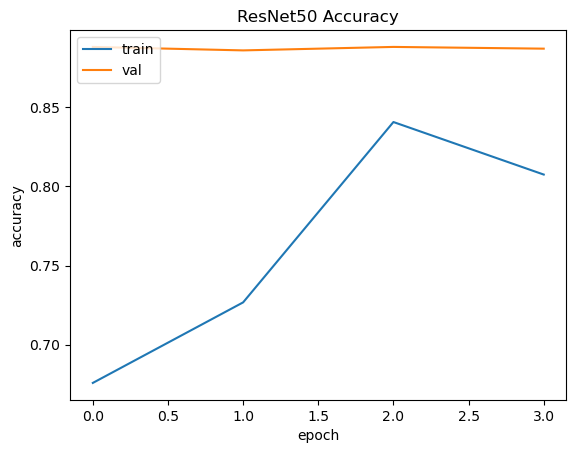

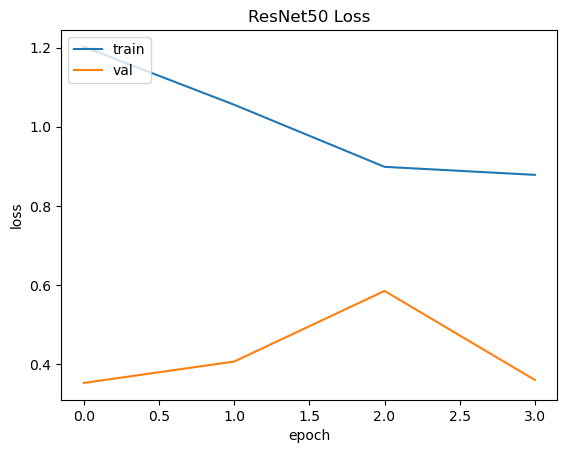

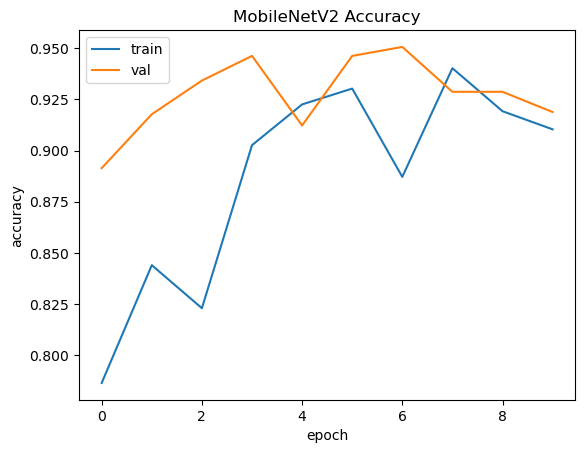

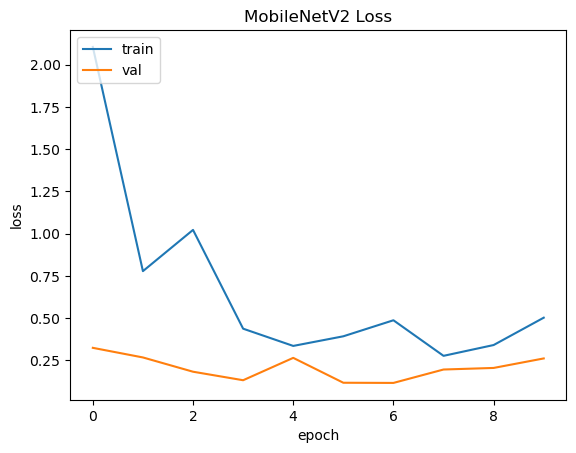

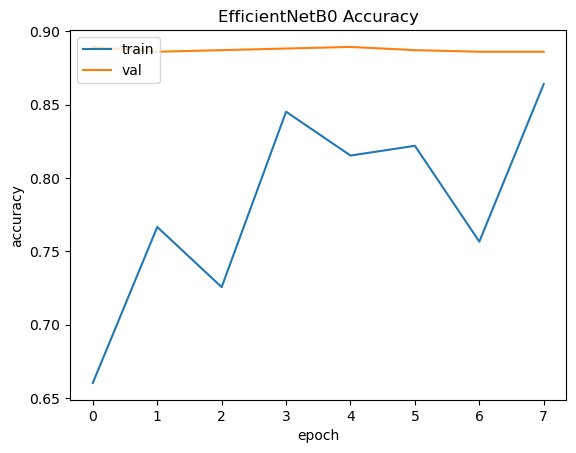

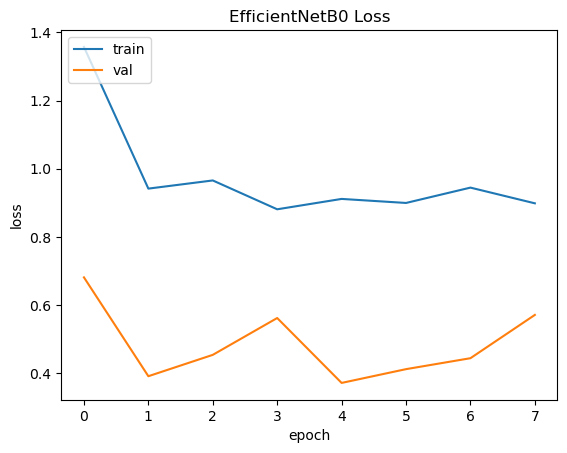

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from time import time

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.efficientnet import EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import recall_score
from tensorflow.keras.metrics import Recall
from keras.models import load_model
from tensorflow.keras.metrics import Recall, Precision
from tensorflow_addons.metrics import F1Score

# 데이터 경로 설정
dataset_path = "/Users/kimsy/DataScience/dataset/fm_img/horizontal/train"

# 이미지 크기
img_size = (224, 224)

# 배치 사이즈
batch_size = 16

# 데이터 증강 및 전처리 정의
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=5,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

# 학습 및 검증용 데이터 생성
train_generator = train_datagen.flow_from_directory(dataset_path,
                                                    target_size=img_size,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    classes=['good', 'ng'])

val_generator = val_datagen.flow_from_directory(dataset_path,
                                                target_size=img_size,
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                classes=['good', 'ng'])

# 모델 생성 함수
def create_model(base_model):
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Flatten()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.2)(x)
    x = Dense(256, activation='relu')(x)
    output_tensor = Dense(2, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=output_tensor)
    
    # 기존 모델 가중치 동결
    for layer in base_model.layers:
        layer.trainable = False
    
    # 모델 컴파일
    model.compile(optimizer=Adam(lr=1e-4),
                  loss = 'binary_crossentropy',  #   loss='categorical_crossentropy',
                  metrics=['accuracy', Recall(), Precision()])
    
    return model

# 모델 학습 함수
def train_model(model, model_name):
    early_stop = EarlyStopping(monitor='val_loss', patience=3)
    checkpoint = ModelCheckpoint(f'{model_name}.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
    
    # 모델 학습
    history = model.fit(train_generator,
                        steps_per_epoch=train_generator.n // batch_size,
                        epochs=30,
                        validation_data=val_generator,
                        validation_steps=val_generator.n // batch_size,
                        callbacks = [early_stop, checkpoint],
                        class_weight={0: 4.0, 1: 1.0})
    
    return history

# 모델 성능 평가 함수
def evaluate_model(model):
    evaluation = model.evaluate(val_generator, steps=val_generator.n // batch_size)
    return evaluation

# 모델 추론 시간 측정 함수
def infer_time(model):
    start_time = time()
    model.predict(val_generator.next()[0])
    end_time = time()
    infer_time = end_time - start_time
    return infer_time

# 모델 리스트
model_list = [ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=(img_size[0], img_size[1], 3))),
              MobileNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=(img_size[0], img_size[1], 3))),
              EfficientNetB0(weights='imagenet', include_top=False, input_tensor=Input(shape=(img_size[0], img_size[1], 3)))]

model_name_list = ['ResNet50', 'MobileNetV2', 'EfficientNetB0']

# 결과 저장 리스트
results = []


histories = []

for i, base_model in enumerate(model_list):
    print(f"Training {model_name_list[i]}...")
    model = create_model(base_model)
    history = train_model(model, model_name_list[i])
    histories.append(history)

    
    print(f"Evaluating {model_name_list[i]}...")
    model = load_model(f'{model_name_list[i]}.h5')
    evaluation = evaluate_model(model)
    infer_time_value = infer_time(model)
    
    result = {'model': model_name_list[i],
              'accuracy': evaluation[1],
              'recall': evaluation[2],
              'inference_time': infer_time_value}
    results.append(result)

# 결과 출력
for result in results:
    print(f"Model: {result['model']}, Accuracy: {result['accuracy']}, Recall: {result['recall']}, Inference Time: {result['inference_time']}")



# 모델별 정확도, 손실 그래프 출력
for i, history in enumerate(histories):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{model_name_list[i]} Accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name_list[i]} Loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
